In [ ]:
# https://www.kaggle.com/tanmoyx/covid19-patient-precondition-dataset?select=covid.csv
# sex: Female - 1, Male - 2
# patien_type:Outpatient - 1, Inpatient - 2
# intubed:Yes - 1, No - 2, Data missing or NA - 97,98,99
# pneumonia:Yes - 1, No - 2, Data missing or NA - 97,98,99
# age Yes - 1, No - 2, Data missing or NA - 97,98,99
# pregnancy Yes - 1, No - 2, Data missing or NA - 97,98,99
# diabetes Yes - 1, No - 2, Data missing or NA - 97,98,99
# copd Yes - 1, No - 2, Data missing or NA - 97,98,99
# asthma Yes - 1, No - 2, Data missing or NA - 97,98,99
# inmsupr Yes - 1, No - 2, Data missing or NA - 97,98,99
# hypertension Yes - 1, No - 2, Data missing or NA - 97,98,99
# other_disease Yes - 1, No - 2, Data missing or NA - 97,98,99
# cardiovascular Yes - 1, No - 2, Data missing or NA - 97,98,99
# obesity Yes - 1, No - 2, Data missing or NA - 97,98,99
# renal_chronic Yes - 1, No - 2, Data missing or NA - 97,98,99
# tobacco Yes - 1, No - 2, Data missing or NA - 97,98,99
# contact_other_covid Yes - 1, No - 2, Data missing or NA - 97,98,99
# covid_res Positive - 1, Negative - 2, Awaiting Results - 3
# icu Yes - 1, No - 2, Data missing or NA - 97,98,99

In [ ]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np


from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# read data
df = pd.read_csv('covid.csv')

df.head()

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97.0,2.0,27.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,97.0
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97.0,2.0,24.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,97.0
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2.0,2.0,54.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,99.0,1.0,2.0
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2.0,1.0,30.0,97.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,99.0,1.0,2.0
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2.0,2.0,60.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,99.0,1.0,2.0


In [ ]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [ ]:
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,89163.000000,89163.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.000000,89162.0,89162.000000
mean,1.547548,1.310499,67.512775,1.760548,45.707016,54.290987,2.207869,2.310962,2.294161,2.351574,2.139252,2.462372,2.321449,2.148068,2.303134,2.274085,37.337128,1.0,67.517126
std,0.497737,0.462700,43.985790,0.537339,16.338932,47.267667,5.990430,5.607729,5.554003,5.910167,5.740115,6.851905,5.744224,5.757296,5.580855,5.814014,47.030612,0.0,43.980470
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
25%,1.000000,1.000000,2.000000,2.000000,34.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.0,2.000000
50%,2.000000,1.000000,97.000000,2.000000,45.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,97.000000
75%,2.000000,2.000000,97.000000,2.000000,57.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,1.0,97.000000
max,2.000000,2.000000,99.000000,99.000000,119.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,1.0,99.000000


In [ ]:
# missing values
# avoid acciendentally delete ages = 97,98,99

#intubed
df=df[df['intubed']!=99]
df=df[df['intubed']!=98]
df=df[df['intubed']!=97]

#pneumonia
df=df[df['pneumonia']!=99]
df=df[df['pneumonia']!=98]
df=df[df['pneumonia']!=97]

#pregnancy
df=df[df['pregnancy']!=99]
df=df[df['pregnancy']!=98]
df=df[df['pregnancy']!=97]

#diabetes
df=df[df['diabetes']!=99]
df=df[df['diabetes']!=98]
df=df[df['diabetes']!=97]

#copd
df=df[df['copd']!=99]
df=df[df['copd']!=98]
df=df[df['copd']!=97]

#asthma
df=df[df['asthma']!=99]
df=df[df['asthma']!=98]
df=df[df['asthma']!=97]

#inmsupr
df=df[df['inmsupr']!=99]
df=df[df['inmsupr']!=98]
df=df[df['inmsupr']!=97]

#hypertension
df=df[df['hypertension']!=99]
df=df[df['hypertension']!=98]
df=df[df['hypertension']!=97]

#other_disease
df=df[df['other_disease']!=99]
df=df[df['other_disease']!=98]
df=df[df['other_disease']!=97]	

#cardiovascular
df=df[df['cardiovascular']!=99]
df=df[df['cardiovascular']!=98]
df=df[df['cardiovascular']!=97]

#obesity
df=df[df['obesity']!=99]
df=df[df['obesity']!=98]
df=df[df['obesity']!=97]

#renal_chronic	
df=df[df['renal_chronic']!=99]
df=df[df['renal_chronic']!=98]
df=df[df['renal_chronic']!=97]

#tobacco
df=df[df['tobacco']!=99]
df=df[df['tobacco']!=98]
df=df[df['tobacco']!=97]

#contact_other_covid
df=df[df['contact_other_covid']!=99]
df=df[df['contact_other_covid']!=98]
df=df[df['contact_other_covid']!=97]

#covid_res
df=df[df['covid_res']!=99]
df=df[df['covid_res']!=98]
df=df[df['covid_res']!=97]

#icu
df=df[df['icu']!=99]
df=df[df['icu']!=98]
df=df[df['icu']!=97]

df.head()
df.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
count,4782.0,4782.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.000000,4781.0,4781.000000
mean,1.0,1.999791,1.869274,1.249948,54.311023,1.980339,1.665969,1.961723,1.970090,1.973437,1.643380,1.970299,1.958377,1.730391,1.961723,1.961305,1.674963,1.0,1.878059
std,0.0,0.014461,0.337135,0.433028,17.193609,0.138848,0.471700,0.191883,0.170357,0.160821,0.479051,0.169779,0.199747,0.443803,0.191883,0.192887,0.468438,0.0,0.327252
min,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000
25%,1.0,2.000000,2.000000,1.000000,43.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.0,2.000000
50%,1.0,2.000000,2.000000,1.000000,55.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000
75%,1.0,2.000000,2.000000,1.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000
max,1.0,2.000000,2.000000,2.000000,101.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000


In [ ]:
# original!
# missing values
#missing_values = ["97","98","99"]
#df = pd.read_csv('sample_data/covid.csv',na_values = missing_values)

#df.describe()

In [ ]:
# original!
# drop missing values
#intermediatedf = df.dropna()
#intermediatedf.describe()

In [ ]:
# all sex = 1 and all patient_type = 2, drop the first two columns: only focus on female inpatient
# we don't care about id: drop it

In [ ]:
df = df.drop(['id','sex','patient_type'], axis = 1) 

df.describe()
df.head()

,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
21,02-06-2020,02-06-2020,9999-99-99,2.0,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
30,22-06-2020,17-06-2020,9999-99-99,2.0,2.0,52.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0
71,17-06-2020,12-06-2020,9999-99-99,2.0,1.0,51.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0
79,08-06-2020,07-06-2020,9999-99-99,1.0,1.0,67.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0
93,27-05-2020,27-05-2020,9999-99-99,2.0,1.0,59.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0


In [ ]:
# New column fatality: Yes-dead; No-Recovered
# df['fatality'] = np.where(df['date_died'] != '9999-99-99', 'Yes', 'No')
df['fatality'] = np.where(df['date_died'] != '9999-99-99', 1, 2)

# calculate entry - symptoms; only include valid records
df['entry_symptoms'] = pd.DataFrame(pd.to_datetime(df['entry_date']) - pd.to_datetime(df['date_symptoms']))

# dropping units
df['entry_symptoms'] = pd.to_numeric(df['entry_symptoms'].astype(str).str[:-4], errors='coerce')

# only include valid records
df = df[df['entry_symptoms'] >= 0]

df.head()

,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality,entry_symptoms
21,02-06-2020,02-06-2020,9999-99-99,2.0,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,0
30,22-06-2020,17-06-2020,9999-99-99,2.0,2.0,52.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2,5
79,08-06-2020,07-06-2020,9999-99-99,1.0,1.0,67.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2,31
93,27-05-2020,27-05-2020,9999-99-99,2.0,1.0,59.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,0
215,22-05-2020,20-05-2020,9999-99-99,2.0,2.0,52.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2,2


In [ ]:
# drop useless columns
df = df.drop(['entry_date','date_symptoms','date_died'], axis = 1) 

df.describe()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality,entry_symptoms
count,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.0,3650.000000,3650.000000,3650.000000
mean,1.867397,1.255616,54.035068,1.978904,1.666027,1.962740,1.970137,1.971781,1.652603,1.969863,1.957260,1.737260,1.960822,1.964110,1.677260,1.0,1.876164,1.739452,41.445753
std,0.339191,0.436267,17.404097,0.143724,0.471695,0.189425,0.170233,0.165621,0.476208,0.170988,0.202297,0.440183,0.194045,0.186042,0.467588,0.0,0.329439,0.438994,64.310155
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,0.000000
25%,2.000000,1.000000,43.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.0,2.000000,1.000000,3.000000
50%,2.000000,1.000000,55.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000,6.000000
75%,2.000000,2.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000,61.000000
max,2.000000,2.000000,101.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000,335.000000


In [ ]:
df.to_csv(path_or_buf="data_half_ready.csv")

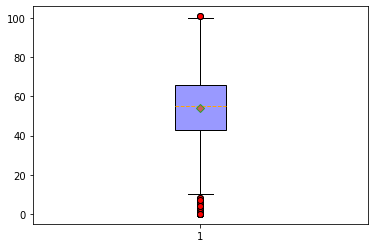

In [ ]:
plt.boxplot(x = df["age"], 
 
            patch_artist=True, 
 
            showmeans=True, 
 
            boxprops = {'color':'black','facecolor':'#9999ff'}, 
 
            flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, 
 
            meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
 
            medianprops = {'linestyle':'--','color':'orange'}) 

plt.show()

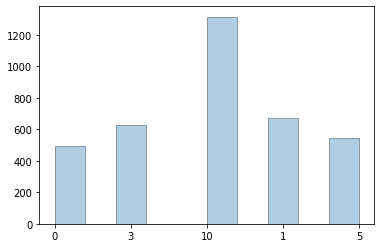

In [ ]:
conditions = [
    (df['entry_symptoms'] <= 1),
    (df['entry_symptoms'] > 1) & (df['entry_symptoms'] <= 3),
    (df['entry_symptoms'] > 3) & (df['entry_symptoms'] <= 5),
    (df['entry_symptoms'] > 5) & (df['entry_symptoms'] <= 10),
    (df['entry_symptoms'] > 10)
    ]

values = ['0', '1', '3', '5','10']

df['date_diff_level'] = np.select(conditions, values)

plt.hist(df['date_diff_level'], edgecolor='k', alpha=0.35) # 设置直方边线颜色为黑色，不透明度为 0.35
plt.show()

In [ ]:
df.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality,entry_symptoms,date_diff_level
21,2.0,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,0,0
30,2.0,2.0,52.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2,5,3
79,1.0,1.0,67.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2,31,10
93,2.0,1.0,59.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,0,0
215,2.0,2.0,52.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2,2,1


In [ ]:
# no longer need entry-symptoms: drop column
df = df.drop(['entry_symptoms'], axis = 1) 

df.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality,date_diff_level
21,2.0,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,0
30,2.0,2.0,52.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2,3
79,1.0,1.0,67.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2,10
93,2.0,1.0,59.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,0
215,2.0,2.0,52.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2,1


In [ ]:
# df['intubed'] = np.where(df['intubed'] == 1, 'Yes', 'No')
# df['pneumonia'] = np.where(df['pneumonia'] == 1, 'Yes', 'No')
# df['pregnancy'] = np.where(df['pregnancy'] == 1, 'Yes', 'No')
# df['diabetes'] = np.where(df['diabetes'] == 1, 'Yes', 'No')
# df['copd'] = np.where(df['copd'] == 1, 'Yes', 'No')
# df['asthma'] = np.where(df['asthma'] == 1, 'Yes', 'No')
# df['inmsupr'] = np.where(df['inmsupr'] == 1, 'Yes', 'No')
# df['hypertension'] = np.where(df['hypertension'] == 1, 'Yes', 'No')
# df['other_disease'] = np.where(df['other_disease'] == 1, 'Yes', 'No')
# df['cardiovascular'] = np.where(df['cardiovascular'] == 1, 'Yes', 'No')
# df['obesity'] = np.where(df['obesity'] == 1, 'Yes', 'No')
# df['renal_chronic'] = np.where(df['renal_chronic'] == 1, 'Yes', 'No')
# df['tobacco'] = np.where(df['tobacco'] == 1, 'Yes', 'No')
# df['contact_other_covid'] = np.where(df['contact_other_covid'] == 1, 'Yes', 'No')
# df['icu'] = np.where(df['icu'] == 1, 'Yes', 'No')

# df['intubed'] = np.where(df['intubed'] == 1, 0, 1)
# df['pneumonia'] = np.where(df['pneumonia'] == 1, 0, 1)
# df['pregnancy'] = np.where(df['pregnancy'] == 1, 0, 1)
# df['diabetes'] = np.where(df['diabetes'] == 1, 0, 1)
# df['copd'] = np.where(df['copd'] == 1, 0, 1)
# df['asthma'] = np.where(df['asthma'] == 1, 0, 1)
# df['inmsupr'] = np.where(df['inmsupr'] == 1, 0, 1)
# df['hypertension'] = np.where(df['hypertension'] == 1, 0, 1)
# df['other_disease'] = np.where(df['other_disease'] == 1, 0, 1)
# df['cardiovascular'] = np.where(df['cardiovascular'] == 1, 0, 1)
# df['obesity'] = np.where(df['obesity'] == 1, 0, 1)
# df['renal_chronic'] = np.where(df['renal_chronic'] == 1, 0, 1)
# df['tobacco'] = np.where(df['tobacco'] == 1, 0, 1)
# df['contact_other_covid'] = np.where(df['contact_other_covid'] == 1, 0, 1)
# df['icu'] = np.where(df['icu'] == 1, 0, 1)

df.head()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality,date_diff_level
21,2.0,2.0,25.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,0
30,2.0,2.0,52.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,2,3
79,1.0,1.0,67.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,2,10
93,2.0,1.0,59.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2,0
215,2.0,2.0,52.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2,1


In [ ]:
# new_conditions = [(df['covid_res'] == 1),(df['covid_res'] == 2),(df['covid_res'] == 3)]
# new_values = ['Positive', 'Negative', 'Waiting']
# df['covid_res'] = np.select(new_conditions, new_values)
df.describe()

,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,fatality
count,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.000000,3650.0,3650.000000,3650.000000
mean,1.867397,1.255616,54.035068,1.978904,1.666027,1.962740,1.970137,1.971781,1.652603,1.969863,1.957260,1.737260,1.960822,1.964110,1.677260,1.0,1.876164,1.739452
std,0.339191,0.436267,17.404097,0.143724,0.471695,0.189425,0.170233,0.165621,0.476208,0.170988,0.202297,0.440183,0.194045,0.186042,0.467588,0.0,0.329439,0.438994
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
25%,2.000000,1.000000,43.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.0,2.000000,1.000000
50%,2.000000,1.000000,55.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000
75%,2.000000,2.000000,66.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000
max,2.000000,2.000000,101.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0,2.000000,2.000000


In [ ]:
df.to_csv(path_or_buf="data_ready.csv")

In [ ]:
df.fatality.unique()

array([2, 1])

In [ ]:
# #split x and y, split train set and test set
# y = df['fatality']
# x = df.drop('fatality',axis = 1)
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train.head

In [ ]:
# # random forest
# #kfold = StratifiedKFold(n_splits=20)
# model = RandomForestClassifier()
# rf_param_grid = {"max_depth": [None],
#                 #  "max_features": [1, 5, 9, 13, 17],
#               "min_samples_split": [6, 7, 8, 9], # 7
#               "min_samples_leaf": [15, 20, 30, 50], # 20
#               "n_estimators" :[500,1000,2000], # 500
#               "criterion": ["gini"]}
# gsmodel = GridSearchCV(model,param_grid = rf_param_grid, scoring="accuracy", n_jobs= 1, verbose = 1)
# gsmodel.fit(x,y)
# model_best = gsmodel.best_estimator_
# print(model_best)
# print(gsmodel.best_score_)

In [ ]:
y = df['fatality']
x = df.drop('fatality',axis = 1)

In [ ]:
# all default
rf0 = RandomForestClassifier(oob_score=True, random_state=10)
rf0.fit(x,y)
print(rf0.oob_score_)
y_predprob = rf0.predict_proba(x)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y, y_predprob))

0.7358904109589041
AUC Score (Train): 0.993245


In [ ]:
param_test1 = {'n_estimators':range(10,201,10)}
gsearch1 = GridSearchCV(estimator = RandomForestClassifier(min_samples_split=100,
                                  min_samples_leaf=20,max_depth=8,max_features='sqrt' ,random_state=10), 
                       param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(x,y)
print(gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_)

{'mean_fit_time': array([0.0249917 , 0.04398894, 0.06576304, 0.0821095 , 0.10203748,
       0.12019649, 0.14710736, 0.1646791 , 0.17984877, 0.20119467,
       0.21806521, 0.24831791, 0.26358657, 0.27793417, 0.29143543,
       0.31366677, 0.33163686, 0.35776386, 0.36854959, 0.39350438]), 'std_fit_time': array([0.00062488, 0.00155026, 0.00499077, 0.00095645, 0.00035983,
       0.00109424, 0.01353631, 0.00865759, 0.00363679, 0.00936672,
       0.00333489, 0.0229208 , 0.01126726, 0.00539   , 0.00186788,
       0.00276018, 0.00412493, 0.01481308, 0.00240467, 0.00193474]), 'mean_score_time': array([0.00463834, 0.0065115 , 0.00768771, 0.00853209, 0.01099086,
       0.01104746, 0.01263795, 0.01391339, 0.01499753, 0.01682887,
       0.01799707, 0.01881976, 0.0204361 , 0.02165694, 0.02272263,
       0.02406855, 0.02580633, 0.02817059, 0.02800064, 0.02967067]), 'std_score_time': array([0.00018888, 0.00074213, 0.00091858, 0.00039602, 0.0019989 ,
       0.0003538 , 0.0004116 , 0.0009813 , 0.0003745

In [ ]:
param_test2 = {'max_depth':range(5,25,2), 'min_samples_split':range(150,500,20)}
gsearch2 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 130, 
                                  min_samples_leaf=20,max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test2, scoring='roc_auc',iid=False, cv=5)
gsearch2.fit(x,y)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


({'mean_fit_time': array([0.31509776, 0.31274066, 0.30948935, 0.31423573, 0.31298485,
         0.30648685, 0.30789824, 0.31744089, 0.31024556, 0.30482969,
         0.30602379, 0.30621386, 0.30899315, 0.30181613, 0.30493536,
         0.30051484, 0.30319128, 0.29823198, 0.32042203, 0.31890392,
         0.3179193 , 0.31874814, 0.31722751, 0.31340623, 0.31371794,
         0.31224675, 0.30943518, 0.31554761, 0.32777839, 0.31786528,
         0.32290478, 0.31706848, 0.31666589, 0.31595554, 0.31720901,
         0.3033916 , 0.33086433, 0.32866211, 0.3230309 , 0.32865782,
         0.32468877, 0.31953449, 0.31579404, 0.31415858, 0.32243857,
         0.32043905, 0.31383157, 0.31243362, 0.31301799, 0.31100855,
         0.31732154, 0.30618572, 0.30994215, 0.30672607, 0.33300138,
         0.32502465, 0.3286561 , 0.3241806 , 0.31828609, 0.32040758,
         0.32621546, 0.316011  , 0.31580596, 0.31270247, 0.31521592,
         0.31643453, 0.31105347, 0.31309438, 0.31924329, 0.30885015,
         0.311352

In [ ]:
param_test3 = {'min_samples_split':range(150,500,20), 'min_samples_leaf':range(5,100,5)}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 130, max_depth=5,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(x,y)
gsearch3.cv_results_, gsearch3.best_params_, gsearch3.best_score_

KeyboardInterrupt: ignored

In [ ]:
param_test4 = {'max_features':range(2,30,1)}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 130, max_depth=5, min_samples_split=150,
                                  min_samples_leaf=5 ,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(x,y)
gsearch4.cv_results_, gsearch4.best_params_, gsearch4.best_score_

In [ ]:
rf2 = RandomForestClassifier(n_estimators= 130, max_depth=5, min_samples_split=150,
                                  min_samples_leaf=5,max_features=14 ,oob_score=True, random_state=10)
rf2.fit(x,y)
rf2.oob_score_

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
dt = DecisionTreeClassifier() # default tree
dt.fit(x_train,y_train) 
dt.predict(x_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2,

In [ ]:
dt.score(x_test, y_test)

0.6520547945205479

In [ ]:
dt1 = DecisionTreeClassifier(random_state = 66)
score = cross_val_score(dt1,x_train,y_train,cv=10).mean()
print('gini score: %.5f'%score)
dt2 = DecisionTreeClassifier(criterion = 'entropy',random_state = 66)
score = cross_val_score(dt2,x_train,y_train,cv=10).mean()
print('entropy score: %.5f'%score)

gini score: 0.69178
entropy score: 0.69486


It can be seen above that the result using entropy is slightly better than using gini.

best parameter and score: [1.         0.78767123]


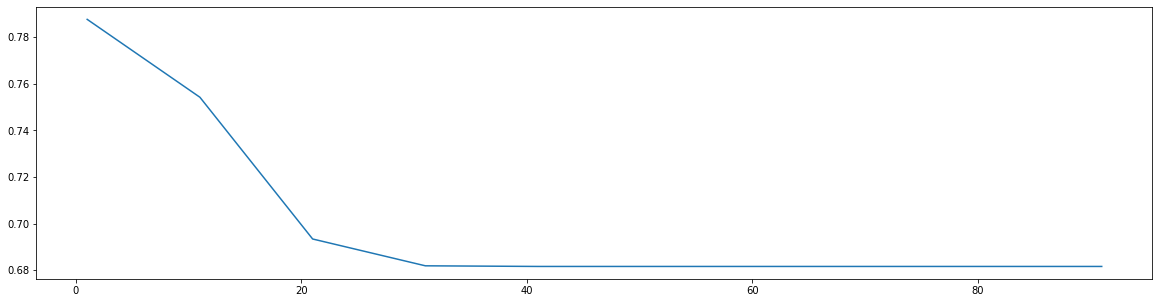

In [ ]:
# draw the plot for parameter:max_depth
ScoreAll = []
for i in range(1,100,10):
    dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = i,random_state = 66)
    score = cross_val_score(dt,x,y,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0]
print("best parameter and score:",ScoreAll[max_score])  
# print(ScoreAll[,0])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [ ]:
param = {'criterion':['gini'],'max_depth':[15,20,30,50,60,100],'min_samples_leaf':[2,3,5,10],'min_impurity_decrease':[0.1,0.2,0.5,0.7]}
grid = GridSearchCV(DecisionTreeClassifier(),param_grid=param,cv=10)
grid.fit(x_train,y_train)
print('best classifier:',grid.best_params_,'best score:', grid.best_score_)

best classifier: {'criterion': 'gini', 'max_depth': 15, 'min_impurity_decrease': 0.1, 'min_samples_leaf': 2} best score: 0.7428082191780823


In [ ]:
dt3 = DecisionTreeClassifier(max_depth=15,min_samples_leaf=2,min_impurity_decrease=0.1)
dt3.fit(x_train,y_train)
y_pred = dt3.predict(x_test)
print('train set score', dt3.score(x_train,y_train),'test set score',dt3.score(x_test,y_test))

train set score 0.7428082191780822 test set score 0.726027397260274
